# Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch 
import torch.nn as nn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Import dataset

In [7]:
df = pd.read_excel(r'C:\Users\Mr_Life\Desktop\PHD Application\CU BOULDER Application\machine learning project\concrete+compressive+strength\Concrete_Data.xls')

In [8]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# converting the dataset to numpy arrays 

In [12]:
data = df.to_numpy()

x=torch.tensor(data[:,0:8], dtype=torch.float)   # input features
y=torch.tensor(data[:,8] ,  dtype=torch.float)   #output features

x.shape, y.shape

(torch.Size([1030, 8]), torch.Size([1030]))

# ML Model Building and training 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([824, 8]),
 torch.Size([206, 8]),
 torch.Size([824]),
 torch.Size([206]))

# Neural network model Development for train and test

In [20]:
import torch
import torch.nn as nn

# Define the neural network model 
def create_model_one_hidden_layer(num_input_cols, num_output_cols):
    model = nn.Sequential(
        nn.Linear(num_input_cols, 10),  # Correct: 'Linear' (capital 'L')
        nn.ReLU(),                       # Correct: 'ReLU' (capital 'R')
        nn.Linear(10, num_output_cols)    # Output layer
    )
    return model

def create_model_more_hidden_layers(num_input_cols, num_output_cols): 
    model = nn.Sequential(
        nn.Linear(num_input_cols, 10),   # Input layer
        nn.ReLU(),                       # Activation
        nn.Linear(10, 50),               # Hidden layer 1
        nn.ReLU(),
        nn.Linear(50, 100),              # Hidden layer 2
        nn.ReLU(),
        nn.Linear(100, 100),             # Hidden layer 3
        nn.ReLU(),
        nn.Linear(100, 100),             # Hidden layer 4
        nn.ReLU(),
        nn.Linear(100, 50),              # Hidden layer 5
        nn.ReLU(),
        nn.Linear(50, 10),               # Hidden layer 6
        nn.ReLU(),
        nn.Linear(10, num_output_cols),  # Output layer
    )
    return model

def train_test_model(model, x_train, y_train, x_test, y_test, num_epochs, learning_rate):
    criterion = nn.MSELoss()  # Correct: 'MSELoss' (capital 'L')
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Correct: 'optimizer' (not 'iptimizer')

    for epoch in range(num_epochs): 
        # Forward pass
        model.train()
        y_pred_train = model(x_train)
        loss_train = criterion(y_pred_train.squeeze(), y_train)
        
        # Backpropagation & optimization
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        # Model testing (evaluation)
        model.eval()
        with torch.no_grad():  # Correct: Added colon ':'
            y_pred_test = model(x_test)
            loss_test = criterion(y_pred_test.squeeze(), y_test)

        if (epoch % 1000 == 0):  # Correct: Added colon ':'
            print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss_train.item():.4f}, Testing Loss: {loss_test.item():.4f}')  # Fixed f-string
    
    print('Training finished!')

# Training and Testing 

In [22]:
num_input_cols = x_train.shape[1]
num_output_cols = 1 # only one column in the output feature
num_epochs = 10000
learning_rate = .0001
model = create_model_more_hidden_layers(num_input_cols, num_output_cols)
train_test_model(model, x_train, y_train, x_test, y_test, num_epochs, learning_rate)

Epoch [1/10000], Training Loss: 1550.7961, Testing Loss: 1574.3325
Epoch [1001/10000], Training Loss: 97.7150, Testing Loss: 95.6954
Epoch [2001/10000], Training Loss: 31.3039, Testing Loss: 35.1647
Epoch [3001/10000], Training Loss: 26.4144, Testing Loss: 32.4676
Epoch [4001/10000], Training Loss: 23.7287, Testing Loss: 31.2870
Epoch [5001/10000], Training Loss: 21.0283, Testing Loss: 30.4289
Epoch [6001/10000], Training Loss: 18.6702, Testing Loss: 29.6739
Epoch [7001/10000], Training Loss: 16.8919, Testing Loss: 29.1628
Epoch [8001/10000], Training Loss: 15.3769, Testing Loss: 28.5654
Epoch [9001/10000], Training Loss: 14.1956, Testing Loss: 28.2891
Training finished!


# Visualizing the model test predictions

In [24]:
model.eval()
with torch.no_grad():
    y_test_predict = model(x_test)

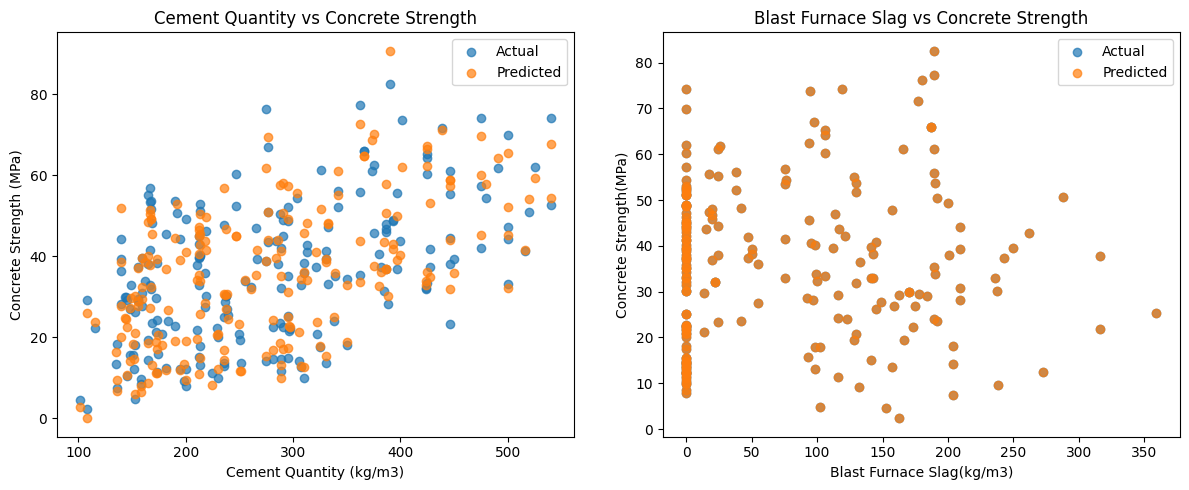

In [27]:
# Create subplot: Cement Quantity vs Concrete Strength and Blast Furnace Slag vs Concrete Strength
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Cement Quantity vs Concrete Strength
axes[0].scatter(x_test[:,0], y_test, label='Actual', alpha=0.7)
axes[0].scatter(x_test[:,0], y_test_predict, label='Predicted', alpha=0.7)
axes[0].set_xlabel('Cement Quantity (kg/m3)') 
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')
axes[0].legend()

# Subplot 2: Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_test[:,1], y_test, label='Actual', alpha=0.7)
axes[1].scatter(x_test[:,1], y_test, label='Predicted', alpha=0.7)
axes[1].set_xlabel('Blast Furnace Slag(kg/m3)')
axes[1].set_ylabel('Concrete Strength(MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')
axes[1].legend()

#adjust spacing between subplots
plt.tight_layout(w_pad=3)  # Combined subplots_adjust with tight_layout
plt.show()

# Lets plot all features against target 

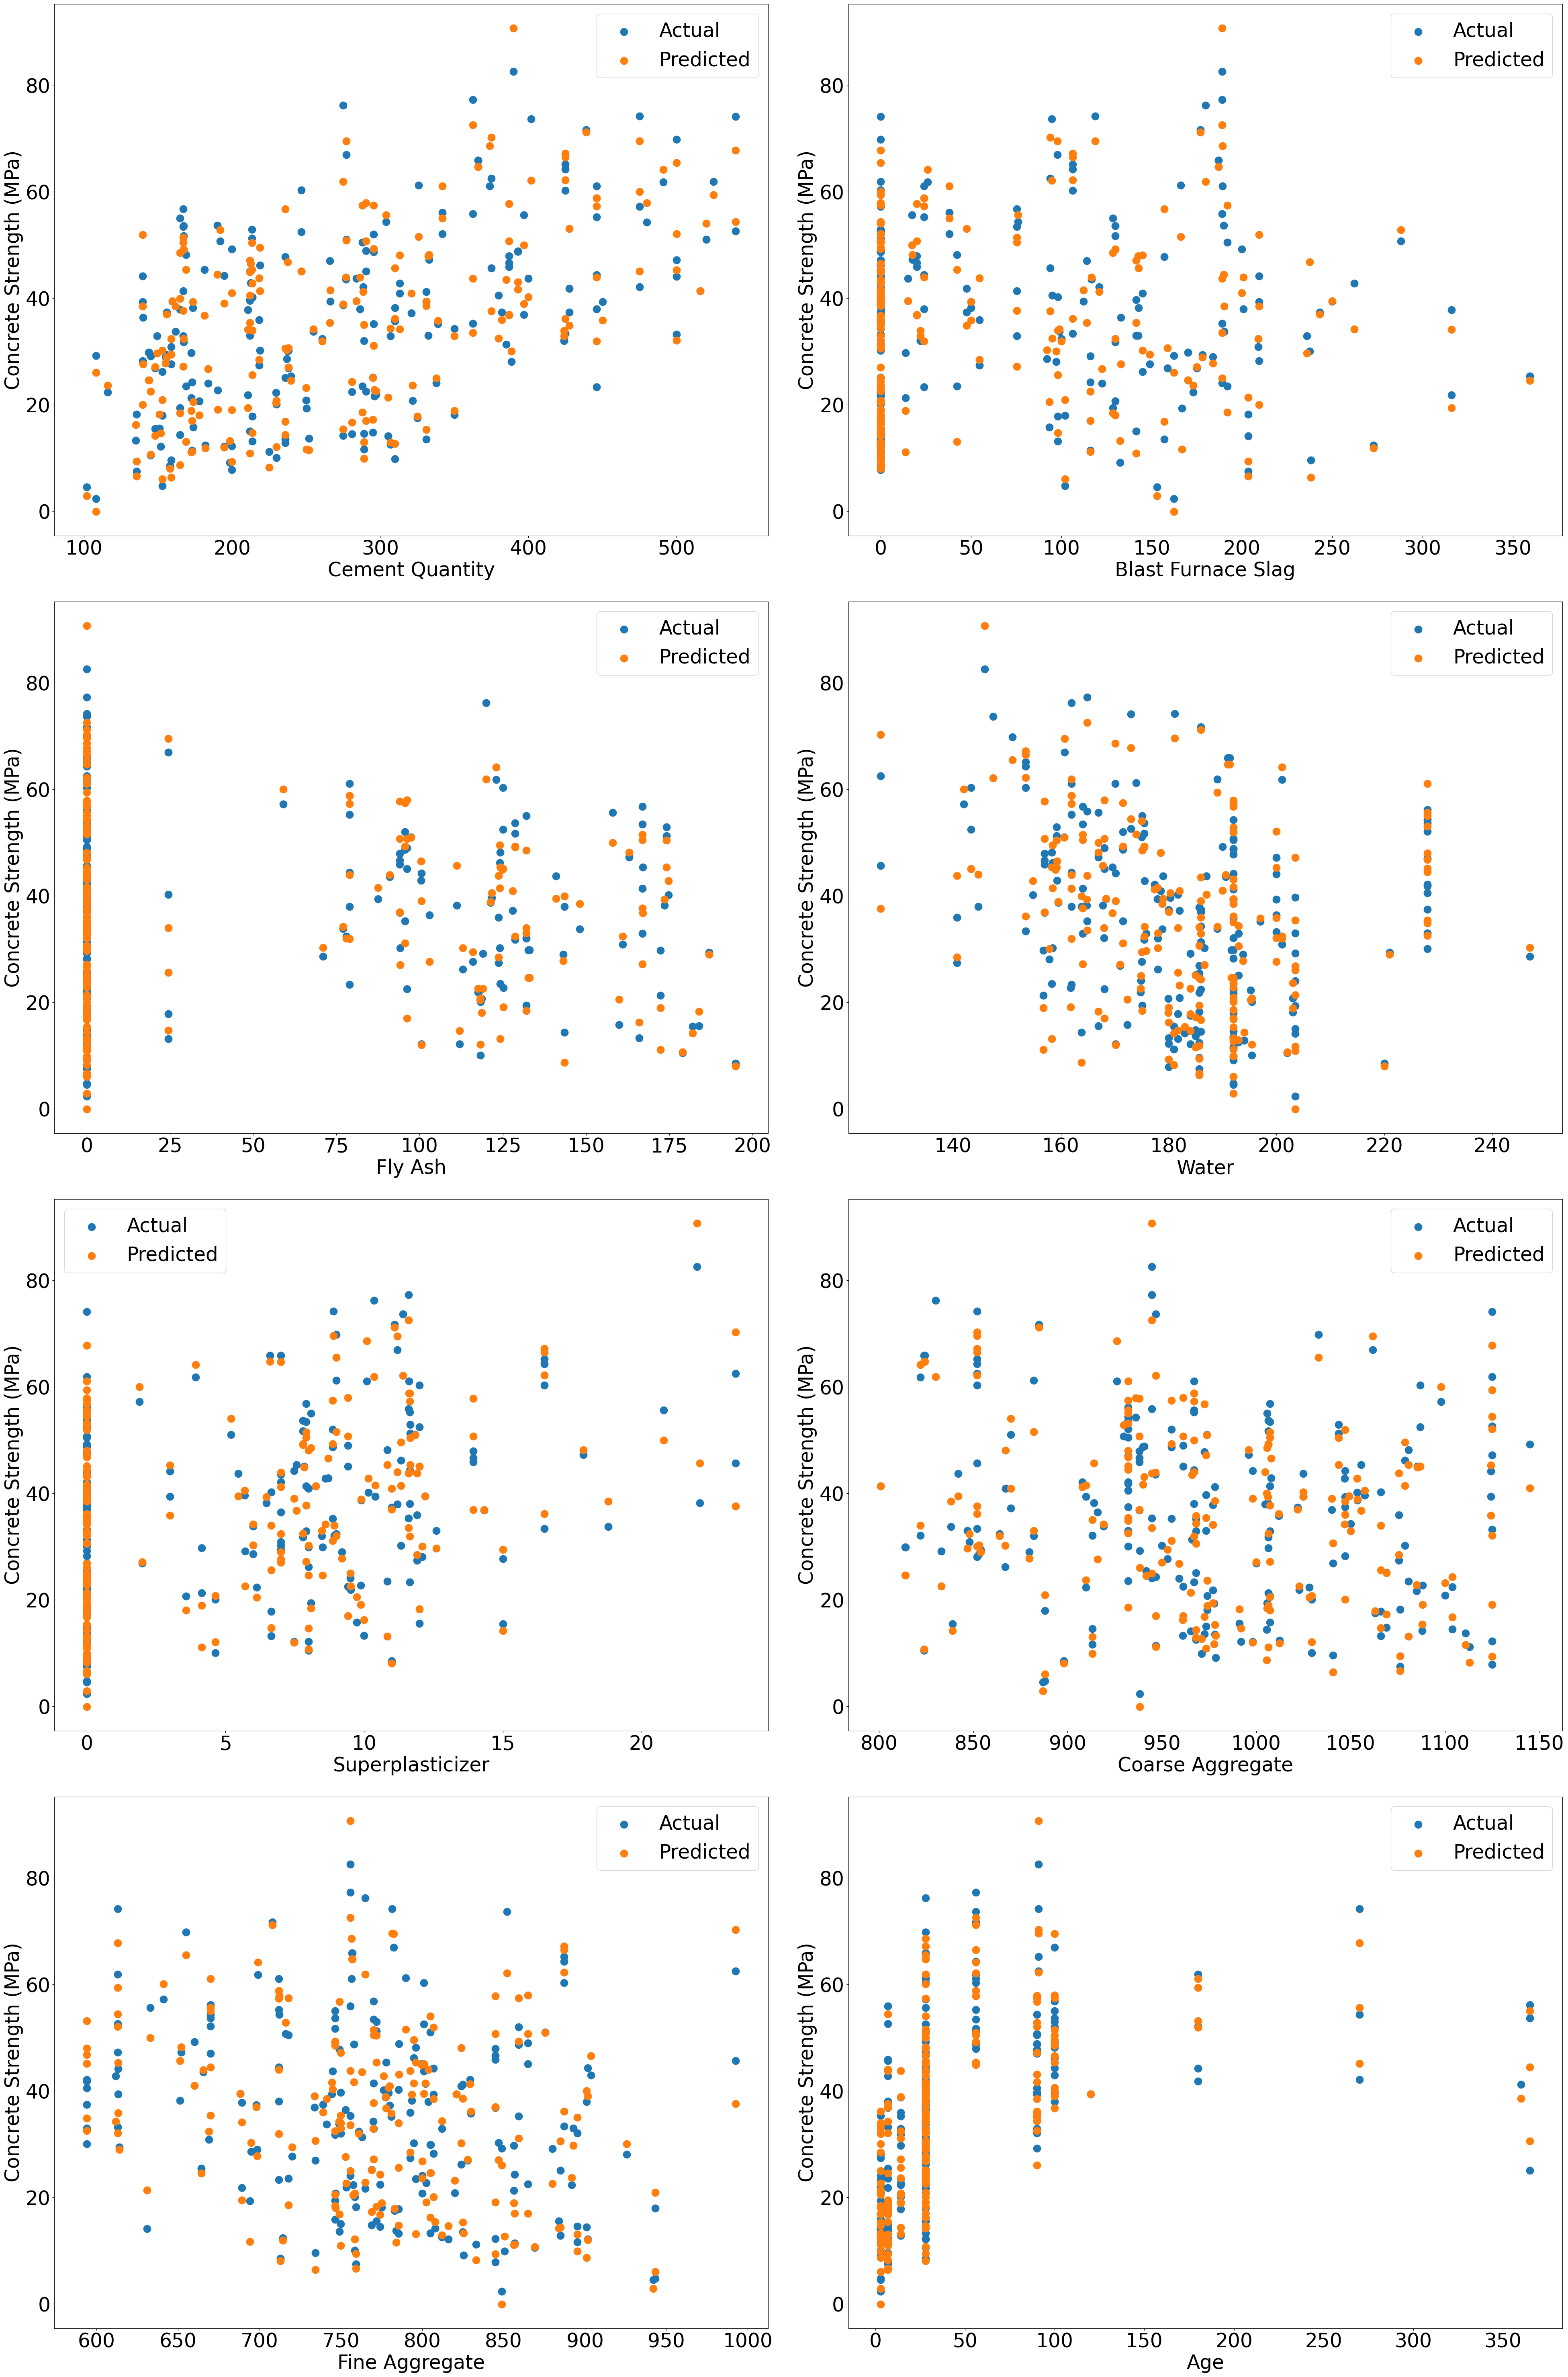

In [28]:
plt.rcParams.update({'font.size': 35})  # Update font sizes for all subplots
fig, axes = plt.subplots(4, 2, figsize=(40, 60))

feature_title = [
    'Cement Quantity', 
    'Blast Furnace Slag', 
    'Fly Ash',
    'Water', 
    'Superplasticizer', 
    'Coarse Aggregate', 
    'Fine Aggregate',  # Fixed typo ("Agregate" → "Aggregate")
    'Age'
]

for row in range(axes.shape[0]):  # Fixed: Added 'in' keyword
    for col in range(axes.shape[1]):
        feature_id = row * axes.shape[1] + col
        axes[row, col].scatter(x_test[:, feature_id], y_test, s=175, label='Actual')  
        axes[row, col].scatter(x_test[:, feature_id], y_test_predict, s=175, label='Predicted')  
        axes[row, col].set_xlabel(feature_title[feature_id])
        axes[row, col].set_ylabel('Concrete Strength (MPa)')
        axes[row, col].legend()  # legend to distinguish Actual vs Predicted

# Adjust spacing between subplots
plt.tight_layout()  # Better than subplots_adjust for automatic spacing
plt.show()

# To evaluate the efficency or accuracy of the model

In [30]:
r2=r2_score(y_test,y_test_predict)
r2

0.902717914884631

# Saving the model

In [36]:
torch.save(model, 'concrete_pytorch_model.pth')

# Making Future Prediction

In [37]:
model_filename = 'concrete_pytorch_model.pth'
model = torch.load('concrete_pytorch_model.pth', weights_only=False)

# Load Ml Data

In [41]:
New_input_feature = np.array([[500, 
                              100, 
                              50, 
                              120, 
                              20, 
                              1200, 
                              800, 
                              28]])
New_input_feature_tensor = torch.tensor(New_input_feature, dtype=torch.float)
yp = model(New_input_feature_tensor)
print('predicted concrete strength in MPa = ', yp[0], ' MPa')

predicted concrete strength in MPa =  tensor([60.0896], grad_fn=<SelectBackward0>)  MPa


# References

Ng. A Machine Learning. Coursera.
Serrano, L. (2021). Grokking Machine learning. Simon and Schuster